In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file_path = 'ANL252_Customers.csv'
customer = pd.read_csv(file_path)
customer.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000.0,39,Healthcare,1,4
1,2,Male,21,35000.0,81,Engineer,3,3
2,3,Female,20,86000.0,6,Engineer,1,1
3,4,Female,23,59000.0,77,Lawyer,0,2
4,5,Female,31,38000.0,40,Entertainment,2,6


In [29]:
print("Number of dimensions:", customer.ndim)
print("Shape of the DataFrame:", customer.shape)

Number of dimensions: 2
Shape of the DataFrame: (2000, 8)


In [30]:
# Q1 (b): Identifying Missing Values
missing_values = customer.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CustomerID                  0
Gender                      1
Age                         0
Annual Income ($)         220
Spending Score (1-100)      0
Profession                 35
Work Experience             0
Family Size                 0
dtype: int64


In [31]:
# Q1 (c) Treatments:
# Removing rows where Gender is missing
customer.dropna(subset=['Gender'], inplace=True)

In [32]:
# Replacing missing Profession values with Unknown Profession
customer['Profession'].fillna('Unknown Profession', inplace=True)

In [33]:
# Filling missing Annual Income values based on median of Work Experience and Profession
customer['filled annual income'] = customer.groupby(['Work Experience', 'Profession'])['Annual Income ($)'].transform(lambda x: x.fillna(x.median()))
customer.drop(columns=['Annual Income ($)'], inplace=True)
customer.rename(columns={'filled annual income': 'Annual Income ($)'}, inplace=True)

In [34]:
# Again checking if theres any missing values
missing_values = customer.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CustomerID                0
Gender                    0
Age                       0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
Annual Income ($)         9
dtype: int64


In [20]:
# Checking if there are still missing values for Annual Income
if customer['Annual Income ($)'].isnull().sum() > 0:
    # Filling remaining missing Annual Income values based on median of Profession only
    customer['Annual Income ($)'] = customer.groupby('Profession')['Annual Income ($)'].transform(lambda x: x.fillna(x.median()))

In [21]:
# Final check for missing values
print("Missing values after treatment:\n", customer.isnull().sum())

Missing values after treatment:
 CustomerID                0
Gender                    0
Age                       0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
Annual Income ($)         0
dtype: int64


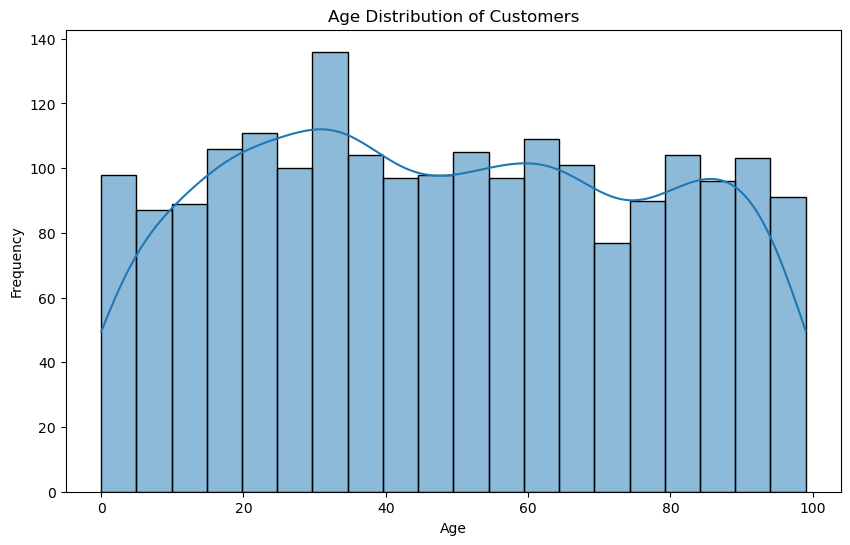

count    1999.000000
mean       48.964982
std        28.435987
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64


In [23]:
# Age Distribution Chart
plt.figure(figsize=(10, 6))
sns.histplot(customer['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age Distribution Table
age_description = customer['Age'].describe()
print(age_description)

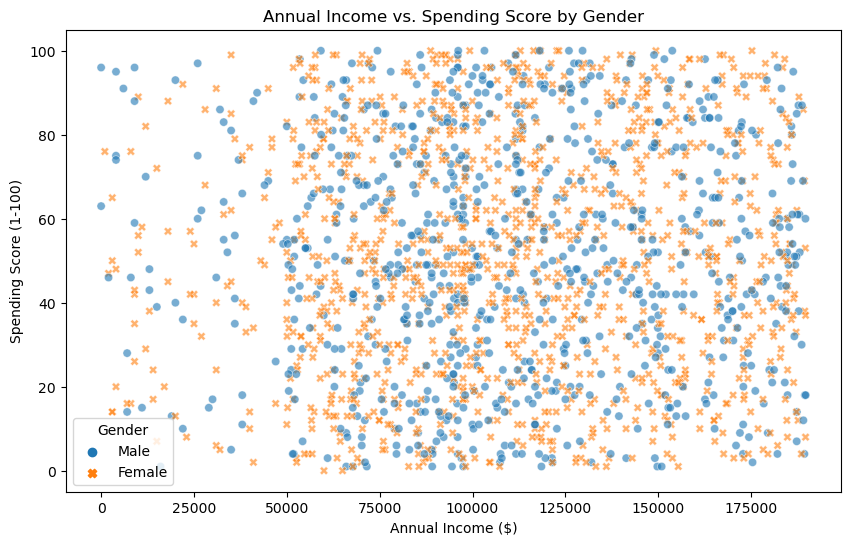

                        Annual Income ($)  Spending Score (1-100)
Annual Income ($)                1.000000                0.023235
Spending Score (1-100)           0.023235                1.000000


In [24]:
# Annual Income vs. Spending Score Chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=customer, hue='Gender', style='Gender', alpha=0.6)
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

# Correlation Table
income_spending_correlation = customer[['Annual Income ($)', 'Spending Score (1-100)']].corr()
print(income_spending_correlation)

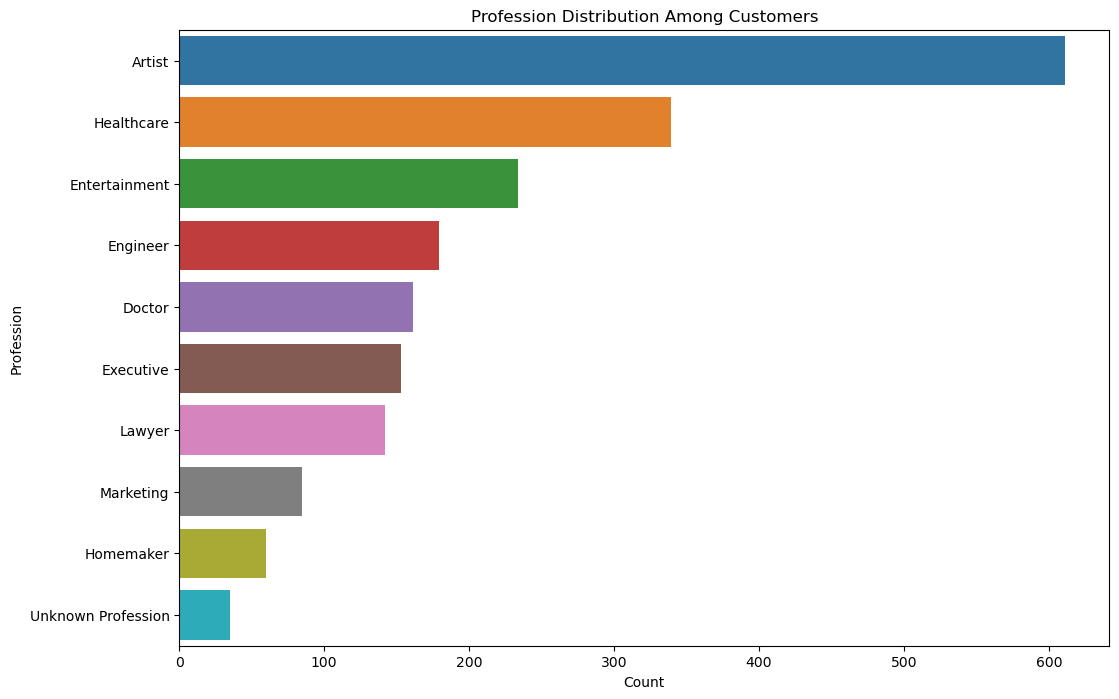

Profession
Artist                611
Healthcare            339
Entertainment         234
Engineer              179
Doctor                161
Executive             153
Lawyer                142
Marketing              85
Homemaker              60
Unknown Profession     35
Name: count, dtype: int64


In [25]:
# Profession Distribution Chart
plt.figure(figsize=(12, 8))
sns.countplot(y='Profession', data=customer, order = customer['Profession'].value_counts().index)
plt.title('Profession Distribution Among Customers')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()

# Profession Distribution Table
profession_counts = customer['Profession'].value_counts()
print(profession_counts)